# Construcción

En esta seccion vamos a demostrar como construir un modelo de Regresión Lineal Simple en R.

Vamos a intentar simplificar al máximo la implementación del modelo. Para realiar esta tarea vamos a crear una función con el nombre de <font color=#8b0000>RegresionLinealFit()</font> que será la encargada de estimar los parámetros $\beta$. Que símplemente consiste en calcular

$$\hat\beta = (X^TX)^{-1}X^Ty$$

In [2]:
RegresionLinealFit <- function(X,Y) {
    # Creamos una matriz de 1
    unos <- matrix(data = 1, nrow = 50, ncol = 1) #El numero nrow depen del dataset usado
    
    # Unimos la matrix X con la matriz de 1
    X <- cbind(unos, X)
    
    X_T <- t(X) # Traspuesta de la matrix X
    B_hat <- solve(X_T %*% X) %*% X_T %*% Y # Aplicamos la funcion 
    
  return(B_hat)
}

In [3]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Una vez hemos construido el modelo solo nos queda probarlo sobre un consjunto de datos. Las pruebas las realizaremos con el conjunto de datos <font color=#8b0000>cars</font>, que contiene datos sobre velocidades y distancias que viajan 50 coches una vez comienzan a frenar.

Veamos como se ven representados dichos datos en una nube de puntos donde el eje *X* es la velocidad a la que circulan los vehiculos y el eje *Y* la distancia que viajan desde el momento que comienzan a frenar. 

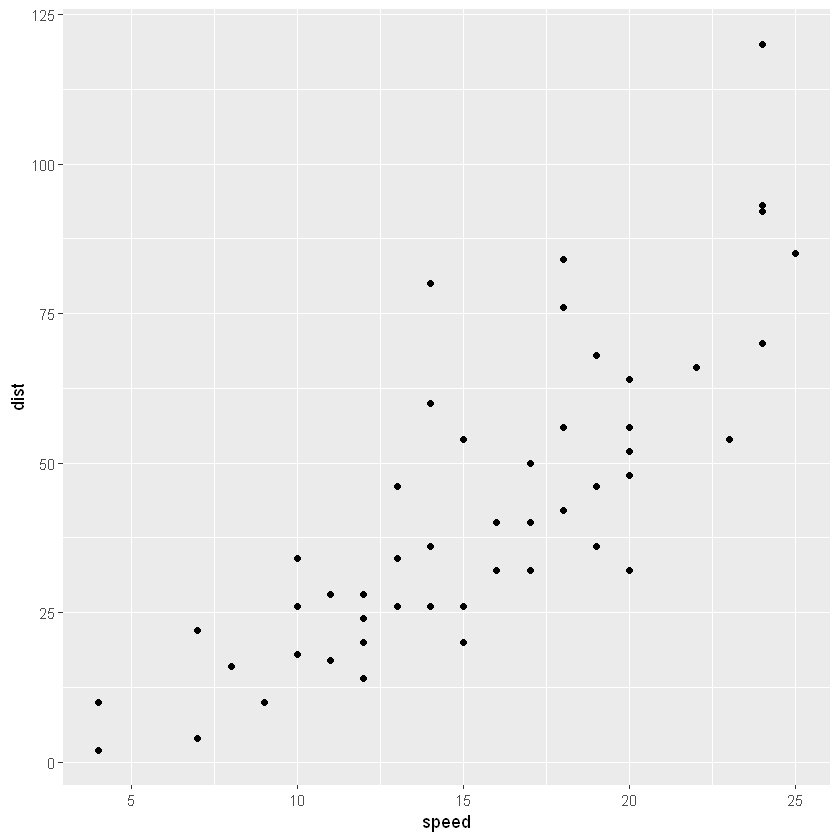

In [6]:
cars %>%
        select(speed, dist) %>%
        ggplot(aes (x = speed, y = dist))+
            geom_point()

El primer paso es separar la variable dependiente de la independiente.

In [9]:
X_list <- cars %>%
        select(speed)

Y_list <- cars %>%
        select(dist)

Nuestro modelo acepta como parámetros de entrada 2 matrices de datos (X e Y). Por lo que a continuación transformamos los datos que se encuantran en listas a matrices.

In [10]:
X_matrix <- matrix(unlist(X_list), ncol = 1, byrow = TRUE)

Y_matrix <- matrix(unlist(Y_list), ncol = 1, byrow = TRUE)

Finalmente ejecutamos la función construida con los parámetros necesarios. En este caso la matrix de datos que contiene la variabel independiente y la matriz de datos que contiene la variabel dependiente.

Almacenamos el resultado en una variable

In [11]:
modelo <- RegresionLinealFit(X_matrix, Y_matrix)

Para finalizar vamos a representar gráficamente el conjunto de datos con la recta que define al mismo. Pero antes debemos asignar los valores a las variables *b*, termino independiente de la ecuación de la recta, y *m*, pendiente de la recta. Para posteriormente introducir los valores de dichas variables en la ecuación

$$y = b + m * x$$

Con esta ecuación podemos hallar la coordenada y en función de la coordenada x con los valore *b* y *m* que nos ha devuelto el modelo de Regresión Lineal. 

In [12]:
modelo_df = as.data.frame(t(modelo), stringsAsFactors = FALSE)

b <- modelo_df %>%
            select(V1)

b <- as.numeric(b)

m <- modelo_df %>%
            select(V2)

m <- as.numeric(m)

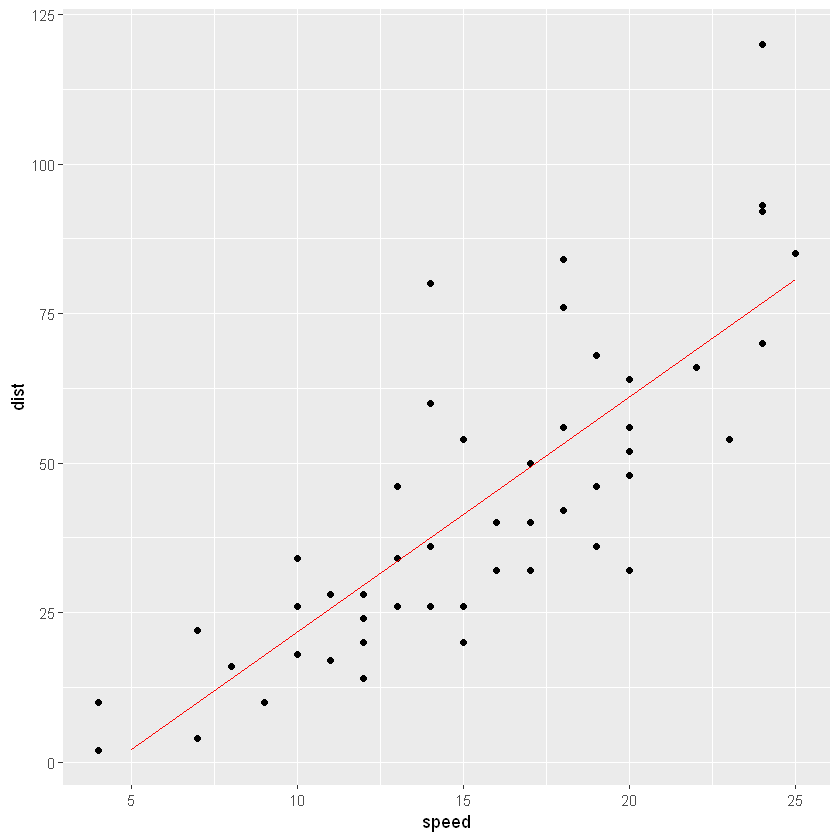

In [13]:
ggplot() +
    geom_point(data = cars, aes (x = speed, y = dist)) +
    geom_line(data = NULL, aes(x= c(5,25) , y=c((5 * m) + b, (25 * m) + b)),color='red')